In [2]:
!pip install numpy
!pip install scipy
!pip install gensim
!pip install -q transformers sentence-transformers


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from gensim.models import KeyedVectors
import gensim.downloader as api
from gensim.test.utils import common_texts
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset
import nltk
import random

/Volumes/Carlos Vallejo SSD/Triple Ten/tripleten-ds/ttds_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'datasets'

## 🧠 Word2Vec: Convertir palabras en números que entienden las máquinas

En ciencia de datos, especialmente cuando trabajamos con **texto**, necesitamos una forma de transformar las **palabras** en **números** para que los modelos de machine learning puedan procesarlas.

Aquí es donde entra **Word2Vec**, una técnica muy poderosa que convierte cada palabra en un vector de números que **representa su significado**.

---

### 🤔 ¿Qué significa "vector" en este contexto?

Un **vector** es simplemente una lista de números. Por ejemplo, la palabra `café` podría ser representada como:

```[0.12, -0.34, 0.87, ..., 0.05]```


Cada número en ese vector **captura algo del significado de la palabra**. Lo más impresionante es que las palabras con significados similares terminan con vectores parecidos.

---

### 🔍 ¿Cómo lo logra Word2Vec?

Word2Vec tiene dos formas principales de aprender:

1. **CBOW (Continuous Bag of Words):** predice una palabra a partir del contexto.
   - Ejemplo: "El ___ está caliente." → el modelo aprende que la palabra probable es `café`.
2. **Skip-gram:** predice el contexto a partir de una palabra.
   - Ejemplo: Si le damos `café`, el modelo intenta predecir palabras como `taza`, `caliente`, `desayuno`.

Ambas técnicas se entrenan viendo millones de frases, y poco a poco el modelo va entendiendo **cómo se relacionan las palabras entre sí**.

---

### ✨ ¿Qué se puede hacer con Word2Vec?

- Saber qué palabras son parecidas: `rey ≈ reina`, `carro ≈ vehículo`
- Operaciones con significado: `Rey - Hombre + Mujer ≈ Reina`
- Mejorar modelos de machine learning con representaciones de texto más inteligentes.

---

### 🛠 Casos de uso reales

- Motores de búsqueda (Google, Bing)
- Recomendadores de productos
- Análisis de sentimientos
- Chatbots

---

✅ En resumen: Word2Vec es como enseñarle a la computadora el significado de las palabras a través de muchas oraciones.


In [ ]:
# Creamos un corpus (conjunto de frases)
corpus = [
    ["me", "gusta", "el", "café"],
    ["prefiero", "el", "té"],
    ["el", "café", "es", "muy", "caliente"],
    ["tomo", "café", "cada", "mañana"],
    ["ella", "toma", "té", "por", "la", "tarde"],
    ["el", "desayuno", "incluye", "café", "y", "pan"]
]

# Entrenamos el modelo Word2Vec
modelo = Word2Vec(
    sentences=corpus,
    vector_size=130,
    window=2,
    min_count=1,
    sg=1)

# Obtenemos el vector de una palabra
print("🔢 Vector de la palabra 'café':")
print(modelo.wv['café'])

# Palabras más parecidas a 'café'
print("\n🔍 Palabras más parecidas a 'café':")
print(modelo.wv.most_similar('café'))


🔢 Vector de la palabra 'café':
[ 7.6647559e-03 -3.3562863e-03 -4.6192107e-04 -4.3819561e-03
  2.9622584e-03  2.1449251e-03  5.3007901e-03  4.6933810e-03
  7.3382286e-03  7.1332459e-03  6.0755140e-03 -5.3766104e-03
 -7.0434138e-03 -2.7350744e-04 -2.3836822e-03  6.0724714e-03
  4.5675687e-03 -1.1887799e-03  1.1618398e-03  1.3760407e-03
  6.0137142e-03 -7.3152627e-03 -1.5694961e-04  2.6695351e-03
 -7.2337443e-04  6.4481637e-03  6.9310428e-03  5.0284481e-03
 -5.4712035e-04  5.9311786e-03 -6.5651233e-03  2.4670027e-03
 -3.5672109e-03 -3.9149052e-03  2.7616445e-03  4.1312324e-03
  5.9765512e-03 -4.4359174e-03  5.7186387e-03  5.0965459e-03
 -2.8538688e-03 -6.7269690e-03  4.1822982e-03  5.0088018e-03
 -6.0658506e-04 -5.1616076e-03 -5.4513207e-03 -1.9197887e-03
  3.9572679e-03 -2.8186461e-03 -7.2071413e-03  2.9435959e-03
  3.7582139e-03 -4.9446952e-03  9.3027420e-04 -1.5964637e-03
  1.8045994e-05 -7.6030027e-03  2.0706153e-03 -3.6545943e-03
  8.3624438e-04 -1.2122755e-03  1.6899091e-03 -6.06259

## 🧠 ¿Cómo Word2Vec genera el vector numérico de una palabra?

Cuando trabajamos con texto, las computadoras no entienden palabras como lo hacemos los humanos. Necesitamos **traducir cada palabra a una secuencia de números** que represente su significado. Word2Vec hace esto usando un modelo de aprendizaje automático muy eficiente.

---

### 📌 Paso a paso: Cómo Word2Vec crea estos vectores

#### 1. **Entrenamiento con muchas frases**
Primero, alimentamos al modelo con muchas frases (un corpus de texto). Por ejemplo:

- "Me gusta el café con leche."
- "Ella toma té por la mañana."
- "El café caliente me despierta."

El modelo no entiende el significado de las palabras, pero sí **aprende de los patrones**.

---

#### 2. **Asignación inicial aleatoria**
Cada palabra se representa inicialmente como un vector de números aleatorios. Por ejemplo:

```"café" → [0.21, -0.47, 0.88, ..., 0.14]```


Estos números **no significan nada al principio**, pero se van ajustando durante el entrenamiento.

---

#### 3. **Dos modelos: CBOW y Skip-gram**

Word2Vec puede entrenarse de dos maneras:

- **CBOW (Continuous Bag of Words)**: intenta predecir una palabra basándose en las palabras que la rodean.
  - Ejemplo: "El ___ está caliente" → el modelo intenta adivinar "café".

- **Skip-gram**: intenta predecir las palabras del contexto a partir de una palabra central.
  - Ejemplo: Dada la palabra "café", intenta predecir palabras cercanas como "caliente", "leche", "mañana".

---

#### 4. **El modelo aprende ajustando los vectores**
Cada vez que el modelo acierta o se equivoca, **ajusta los números del vector** de cada palabra, como un estudiante que mejora con la práctica. Esto se hace usando una técnica matemática llamada **retropropagación**, muy común en redes neuronales.

Después de muchos ejemplos, el modelo logra que las palabras que aparecen en contextos similares terminen con vectores parecidos.

---

#### 5. **Los vectores finales representan el "significado" de la palabra**

Después de entrenar, la palabra "café" tendrá un vector como:

```"café" → [0.12, -0.34, 0.87, ..., 0.05]```


Y palabras similares, como "té", tendrán vectores **cercanos en el espacio**.

---

### 🎯 ¿Qué se puede hacer con estos vectores?

- Encontrar palabras parecidas: `modelo.wv.most_similar('café')`
- Medir qué tan parecidas son dos palabras: `modelo.wv.similarity('café', 'té')`
- Usarlos como entrada para modelos de clasificación o clustering
- Visualizar agrupaciones semánticas de palabras

---

### 🧠 Analogía para recordarlo

Imagina que tienes un radar que mide "dónde vive cada palabra" en un espacio de significados. Palabras que aparecen en frases parecidas, terminan "viviendo" cerca:

```
Vecinos cercanos de 'café': té, leche, taza, desayuno
Vecinos cercanos de 'reina': rey, princesa, corona
```

Word2Vec se encarga de ubicar cada palabra en el vecindario correcto.

In [ ]:
oraciones = [
    # Vida diaria
    "el perro corre en el parque",
    "la niña juega con su muñeca",
    "el gato duerme sobre el sofá",
    "el niño come una manzana roja",
    "la abuela cocina una sopa caliente",
    "el coche rojo va muy rápido",
    "el panadero hornea pan fresco cada mañana",
    "la familia cena junta todos los domingos",
    "los vecinos organizan una fiesta en el jardín",
    "la lluvia moja las calles del barrio",

    # Naturaleza
    "los pájaros cantan en la mañana",
    "el sol brilla en el cielo azul",
    "las flores florecen en primavera",
    "los árboles pierden sus hojas en otoño",
    "el río fluye entre las montañas",
    "la luna ilumina la noche oscura",
    "el viento sopla con fuerza en la colina",
    "las mariposas vuelan sobre los campos",
    "la nieve cubre el bosque silencioso",
    "las estrellas brillan en el firmamento",

    # Tecnología
    "el programador escribe código en python",
    "la computadora procesa datos rápidamente",
    "el teléfono móvil tiene una nueva actualización",
    "la inteligencia artificial aprende de los datos",
    "el robot limpia el suelo de la casa",
    "el ingeniero diseña un puente resistente",
    "la aplicación envía notificaciones al usuario",
    "la base de datos almacena información segura",
    "el servidor responde a miles de peticiones",
    "la impresora imprime documentos en color",

    # Educación
    "la maestra enseña matemáticas en la escuela",
    "los estudiantes leen libros en la biblioteca",
    "el profesor explica historia con ejemplos claros",
    "la clase de ciencias es muy interesante",
    "los alumnos escriben un ensayo sobre ecología",
    "el examen incluye preguntas de comprensión lectora",
    "la universidad ofrece cursos en línea gratuitos",
    "los investigadores publican sus hallazgos",
    "la biblioteca digital tiene acceso abierto",
    "los niños aprenden jugando en el aula",

    # Salud
    "el doctor revisa los signos vitales del paciente",
    "la enfermera administra la vacuna",
    "el hospital cuenta con tecnología moderna",
    "la medicina alivia el dolor de cabeza",
    "la cirugía fue un éxito total",
    "el paciente debe seguir una dieta saludable",
    "el termómetro indica fiebre alta",
    "el psicólogo ayuda a manejar el estrés",
    "el dentista recomienda usar hilo dental",
    "el tratamiento requiere varios días de descanso"
]

# Crear el DataFrame
df = pd.DataFrame(oraciones, columns=["texto"])
df.head()


,texto
0,el perro corre en el parque
1,la niña juega con su muñeca
2,el gato duerme sobre el sofá
3,el niño come una manzana roja
4,la abuela cocina una sopa caliente


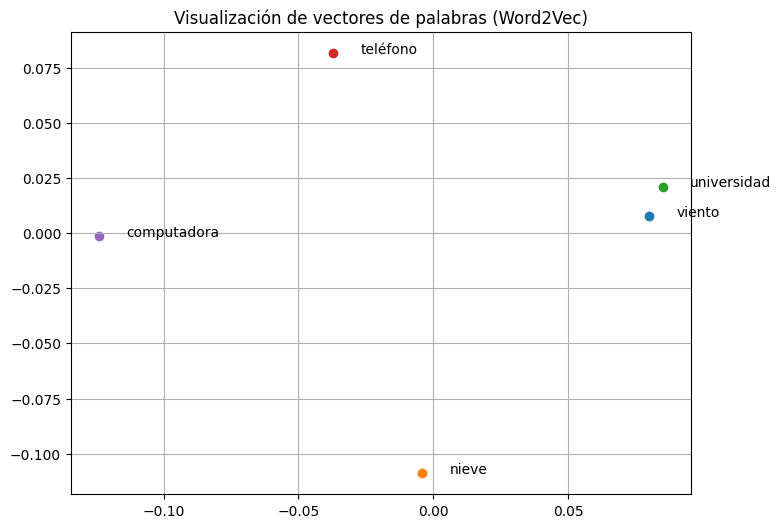

In [ ]:
# Entrenamos el modelo Word2Vec
modelo = Word2Vec(
    sentences= [ row.split() for row in df['texto'].values],
    vector_size=20,
    window=2,
    min_count=1,
    sg=1,
    seed=42
  )

# Obtenemos algunas palabras
palabras = ["viento", "nieve", "universidad","teléfono","computadora"]
vectores = [modelo.wv[w] for w in palabras]

# Reducimos dimensiones para graficar
pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(vectores)

# Graficamos los vectores
plt.figure(figsize=(8, 6))
for i, palabra in enumerate(palabras):
    plt.scatter(*vectores_2d[i])
    plt.text(vectores_2d[i][0] + 0.01, vectores_2d[i][1] , palabra)

plt.title("Visualización de vectores de palabras (Word2Vec)")
plt.grid(True)
plt.show()


[==================================================] 100.0% 128.1/128.1MB downloaded


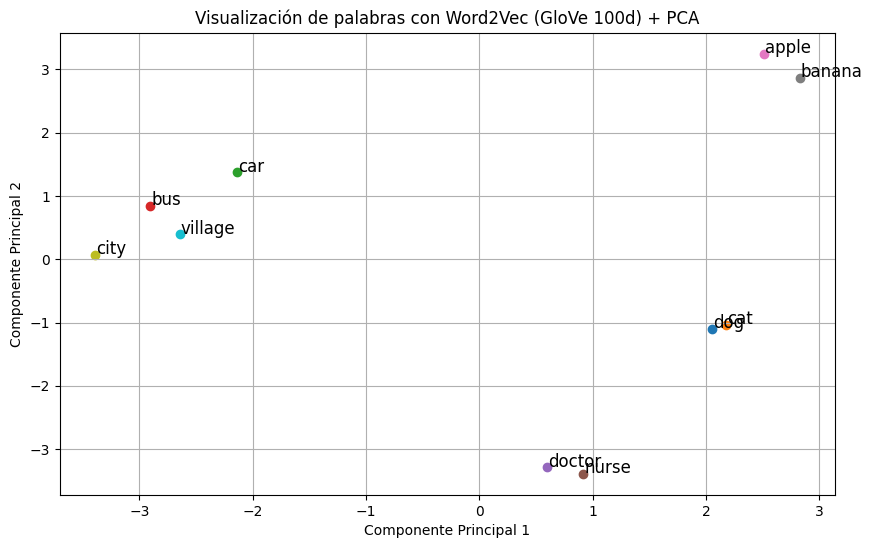

In [ ]:
model = api.load("glove-wiki-gigaword-100")  # Modelo ligero (~128MB), vector de 100 dimensiones

# Lista de palabras a visualizar
palabras = ['dog', 'cat', 'car', 'bus', 'doctor', 'nurse', 'apple', 'banana', 'city', 'village']

# Obtener vectores de las palabras
vectores = [model[word] for word in palabras]

# Reducir dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(vectores)

# Graficar
plt.figure(figsize=(10, 6))
for i, palabra in enumerate(palabras):
    x, y = vectores_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, palabra, fontsize=12)

plt.title('Visualización de palabras con Word2Vec (GloVe 100d) + PCA')
plt.grid(True)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

-----------------------------------

# 🤖 ¿Qué es BERT y cómo funciona?

**BERT** significa *Bidirectional Encoder Representations from Transformers*, y fue desarrollado por Google en 2018.  
Es un modelo de lenguaje basado en inteligencia artificial que **aprende a entender el significado de las palabras dentro de un texto, tomando en cuenta el contexto completo**.

---

## 🧩 ¿Por qué BERT es especial?

Antes de BERT, muchos modelos leían las frases **de izquierda a derecha** o **de derecha a izquierda**, pero **no en ambas direcciones al mismo tiempo**. Esto limitaba la comprensión del lenguaje, porque el significado de una palabra puede depender tanto de lo que está antes **como de lo que viene después**.

BERT es **bidireccional**, lo que significa que entiende las frases **como lo haría una persona**: considerando todo lo que rodea a una palabra.

### ✨ Ejemplo real:

> Frase: “El banco está cerrado los domingos.”

La palabra **"banco"** puede significar un lugar para sentarse o una entidad financiera.  
BERT analiza las demás palabras (como *cerrado* y *domingos*) y deduce que se refiere a una **institución financiera**.

---

## 🏗️ ¿Cómo está construido BERT?

BERT está basado en una arquitectura llamada **Transformer**, específicamente en su parte llamada **encoder**.

Un Transformer es un modelo diseñado para procesar secuencias de datos, como oraciones. Usa un mecanismo llamado **atención** (*attention*), que le permite enfocarse en las palabras más importantes sin perder la conexión con las demás.

### 🔍 ¿Qué significa "atención"?

Imagina que estás leyendo un párrafo y una palabra no te queda clara. Tu cerebro automáticamente **regresa y reevalúa las palabras clave alrededor** para entender mejor. Eso mismo hace BERT.

---

## 🎓 ¿Cómo se entrena BERT?

BERT se entrena con **millones de frases** tomadas de libros y Wikipedia usando dos tareas principales:

### 1. **Masked Language Modeling (MLM)**  
Se ocultan algunas palabras al azar de una frase, y BERT debe adivinarlas basándose en las otras palabras.

Ejemplo:
- Entrada: “Los estudiantes fueron al [MASK] a estudiar.”
- BERT aprende que la palabra más probable es *parque*, *salón*, o *biblioteca*, dependiendo del contexto.

### 2. **Next Sentence Prediction (NSP)**  
Se le dan dos frases y el modelo debe decir si la segunda frase sigue lógicamente a la primera.

Ejemplo:
- Frase A: “María preparó café.”
- Frase B: “Luego se sentó a leer un libro.”  
✅ → Sí, tiene sentido.

- Frase B: “El león cazó una cebra.”  
❌ → No tiene relación.

---

## 🧪 ¿Para qué se puede usar BERT?

Una vez entrenado, BERT se puede aplicar a muchos problemas reales:

- ✅ **Clasificación de texto**: Detectar si un tweet es ofensivo, si una reseña es positiva o negativa, etc.
- ❓ **Preguntas y respuestas**: Dado un párrafo, encontrar la respuesta a una pregunta.
- 📄 **Reconocimiento de entidades**: Identificar nombres de personas, lugares o marcas en un texto.
- 🔍 **Mejorar motores de búsqueda**: Mostrar resultados más relevantes en Google o en sitios web.

---

## 🧠 ¿Qué hace BERT cuando le das una frase?

1. **Tokeniza** (divide) el texto en pequeñas unidades llamadas *tokens*.
2. Representa esos tokens como vectores (números que capturan el significado).
3. Usa su red neuronal para calcular qué tan relacionados están los tokens entre sí.
4. Produce una salida que resume el contenido, que luego puede usarse para tareas específicas (clasificar, responder, etc.).

---

## 🛤️ Resumen visual

```
Frase de entrada → Tokenización → Embeddings → Transformer (con atención) → Salida útil
```

---

## 💡 En resumen

| Concepto clave        | Qué significa |
|-----------------------|----------------|
| **Bidireccional**     | Lee en ambas direcciones para entender el contexto completo. |
| **Transformer**       | Arquitectura que analiza todo el texto a la vez, con "atención". |
| **Pre-entrenamiento** | Aprende con millones de frases antes de hacer tareas reales. |
| **Transferencia**     | Una vez entrenado, puedes usarlo en muchas aplicaciones con pocos datos. |

---

> 🧠 **BERT no solo entiende palabras, entiende ideas.** Por eso ha sido tan poderoso para avanzar en cómo las máquinas comprenden el lenguaje humano.


In [ ]:
# Cargamos un modelo BERT multilingüe
modelo_bert = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Frases de ejemplo
frases = [
    "El clima está soleado hoy",
    "Me gusta programar en Python",
    "Fui al banco a sacar dinero",
    "Me senté en un banco del parque"
]

# Obtener representaciones numéricas (vectores)
vectores = modelo_bert.encode(frases)

# Ver el vector de la primera frase
print("Vector de la primera frase:")
print(vectores[0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.24k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Vector de la primera frase:
[ 4.15512249e-02 -6.11615330e-02 -4.84195203e-02  1.96541008e-02
  4.91960682e-02  5.77347763e-02 -9.06081945e-02  8.41926485e-02
  5.60578853e-02  4.53816950e-02  6.67968988e-02 -2.98528746e-02
 -1.72407012e-02  2.07110271e-02 -4.78500053e-02  2.66876761e-02
 -1.73790604e-02  1.94554124e-02 -4.86234017e-02 -3.82110849e-02
 -5.55309989e-02  2.62419060e-02  1.10740410e-02  8.17274954e-03
  2.60993391e-02  7.66056683e-03 -1.46892006e-02  6.04057964e-03
 -1.72464773e-02  3.40008922e-02 -2.91276965e-02 -2.50657904e-03
 -7.73837864e-02 -1.32281289e-01  3.45586091e-02 -1.08319847e-02
 -4.45242189e-02  5.31091774e-03  1.93162747e-02  1.87547784e-02
 -1.54942255e-02  1.25957923e-02  1.69937704e-02  2.90990360e-02
 -6.82615414e-02  7.28819743e-02  7.05924854e-02  9.84358322e-03
  3.12055591e-02  3.07069030e-02  2.23187376e-02 -8.97239894e-02
 -1.77664831e-02 -6.86737671e-02  9.70646646e-03 -3.20096463e-02
  1.65345930e-02 -6.06596917e-02  1.11679826e-02 -1.89000778e-

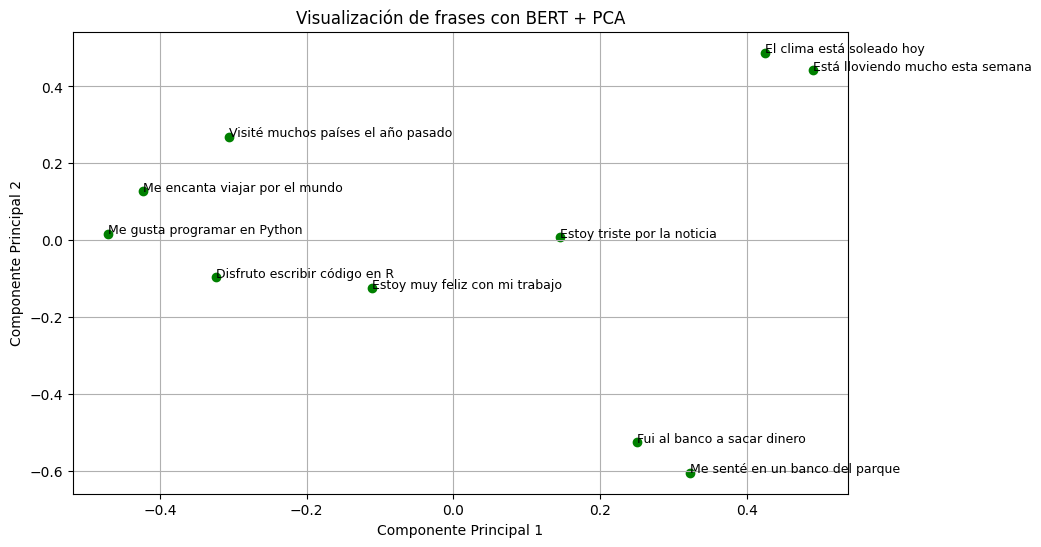

In [ ]:
# Crear una lista de frases
frases = [
    "El clima está soleado hoy",
    "Está lloviendo mucho esta semana",
    "Me gusta programar en Python",
    "Disfruto escribir código en R",
    "Fui al banco a sacar dinero",
    "Me senté en un banco del parque",
    "Estoy muy feliz con mi trabajo",
    "Estoy triste por la noticia",
    "Me encanta viajar por el mundo",
    "Visité muchos países el año pasado"
]

# Obtener los vectores de cada frase
vectores = modelo_bert.encode(frases)

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
vectores_2d = pca.fit_transform(vectores)

# Graficar los vectores en 2D
plt.figure(figsize=(10, 6))
plt.scatter(vectores_2d[:, 0], vectores_2d[:, 1], color='green')

# Agregar texto a cada punto
for i, frase in enumerate(frases):
    plt.text(vectores_2d[i, 0] , vectores_2d[i, 1] , frase, fontsize=9)

plt.title("Visualización de frases con BERT + PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# 🧠 Ejercicio de Análisis de Sentimientos con SentenceTransformer

En este ejercicio pondremos en práctica un flujo de trabajo completo de análisis de sentimientos usando modelos de lenguaje preentrenados.

### 🎯 Objetivo

Construir un modelo de clasificación de sentimientos (positivo, negativo, neutro) a partir de un conjunto de textos en español.

### 📝 Instrucciones

1. Usar uno real con al menos dos columnas:
   - `texto`: la reseña, comentario o frase.
   - `target`: la etiqueta asociada (positivo, negativo o neutro).

2. **Transformar el texto en vectores** utilizando el modelo preentrenado `SentenceTransformer('distiluse-base-multilingual-cased-v1')`, que convierte frases en español (y otros idiomas) en representaciones numéricas.

3. **Entrenar un modelo de clasificación** con los vectores generados. Puedes usar un modelo simple como `RandomForestClassifier` o `LogisticRegression`.

4. **Evaluar el desempeño del modelo** usando métricas como `accuracy`, `precision`, `recall` y `f1-score`.

5. **(Opcional)** Visualizar la matriz de confusión para identificar cómo se comporta el modelo con cada clase.

### 📌 Puntos a tener en cuenta

- Asegúrate de balancear las clases (que haya un número similar de ejemplos positivos, negativos y neutros).
- Puedes dividir tu dataset en conjunto de entrenamiento y prueba (por ejemplo, 80/20).
- Este ejercicio simula cómo se entrena un clasificador real para tareas de procesamiento de lenguaje natural (NLP).

### 🚀 Herramientas recomendadas

- `pandas` para manejar los datos.
- `sentence-transformers` para vectorizar el texto.
- `sklearn` para entrenar y evaluar el modelo.

Una vez completes este ejercicio, habrás construido un clasificador de sentimientos usando embeddings de frases multilingües ✨


In [ ]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

documentos = [(movie_reviews.raw(fileid), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

# Mezclar aleatoriamente los datos (opcional pero recomendado)
random.shuffle(documentos)

# Separar textos y etiquetas
textos = [doc for doc, label in documentos]
etiquetas = [label for doc, label in documentos]

ejercicio = pd.DataFrame({
    'texto':textos,
    'target':etiquetas
    })

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
# ✅ Paso 4: Convertimos las etiquetas de texto a números
label_encoder = LabelEncoder()
ejercicio["target"] = label_encoder.fit_transform(ejercicio["target"])  # 0=negativo, 1=neutro, 2=positivo

In [ ]:
# ✅ Paso 5: Convertimos los textos en vectores usando SentenceTransformer
modelo_embeddings = SentenceTransformer('distiluse-base-multilingual-cased-v1')
X = modelo_embeddings.encode(ejercicio["texto"].tolist())

In [ ]:
# ✅ Paso 6: Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, ejercicio["target"], test_size=0.3, random_state=42)

In [ ]:
# ✅ Paso 7: Entrenamos un modelo de clasificación
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# ✅ Paso 8: Evaluamos el modelo
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Matriz de confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:

              precision    recall  f1-score   support

         neg       0.63      0.63      0.63       303
         pos       0.62      0.62      0.62       297

    accuracy                           0.62       600
   macro avg       0.62      0.62      0.62       600
weighted avg       0.62      0.62      0.62       600

Matriz de confusión:

[[191 112]
 [113 184]]
